In [ ]:
# General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from tabulate import tabulate

# Regression Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Part 0: Loading and Preprocessing

In [ ]:
# Data class for preprocessing
class Data():

  def __init__(self):
    # Load in dataset to pandas DataFrame
    self.wine_data = pd.read_csv("https://github.com/SBodapati11/Linear-Regression-using-Gradient-Descent/blob/main/data/winequality-white.csv?raw=true", delimiter=";")
    self.attributes = []
    self.target_variable = ""

    # Drop duplicate rows
    self.wine_data.drop_duplicates(inplace=True)

    self.check_missing_values()

    # Get the correlation matrix for the columns
    self.corr_matrix = self.wine_data.corr().round(2)

    self.x_train = None
    self.x_test = None
    self.y_train = None
    self.y_test = None
    self.y_train_predicted = None
    self.y_test_predicted = None

  # Check for any missing values and null/NA values
  def check_missing_values(self):
    print(sum(self.wine_data.isna().sum()))
    print(sum(self.wine_data.isnull().sum()))

  # Find any outliers in the data and remove them
  def remove_outliers(self):
    Q1 = self.wine_data.quantile(0.25)
    Q3 = self.wine_data.quantile(0.75)
    IQR = 1.5 * (Q3 - Q1)
    self.wine_data = self.wine_data[~((self.wine_data[self.attributes] < (Q1 - IQR)) | (self.wine_data[self.attributes] > (Q3 + IQR))).any(axis=1)]

  # Standardize the attributes
  def standardize(self):
    standard_scaler = StandardScaler()
    column_transformer = ColumnTransformer([
            ('scaler', StandardScaler(), self.attributes)
        ], remainder='passthrough')
    self.wine_data = pd.DataFrame(column_transformer.fit_transform(self.wine_data))

  # Split the data into training and test sets with the given test size and state
  def split_data(self, test_size, random_state):
    X = self.wine_data[[i for i in range(len(self.attributes))]]
    Y = self.wine_data[[len(self.attributes)]]
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)


In [ ]:
data = Data()
data.wine_data.head()

0
0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [ ]:
# Get the statistics of the data
data.wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
# Get information about the data
data.wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


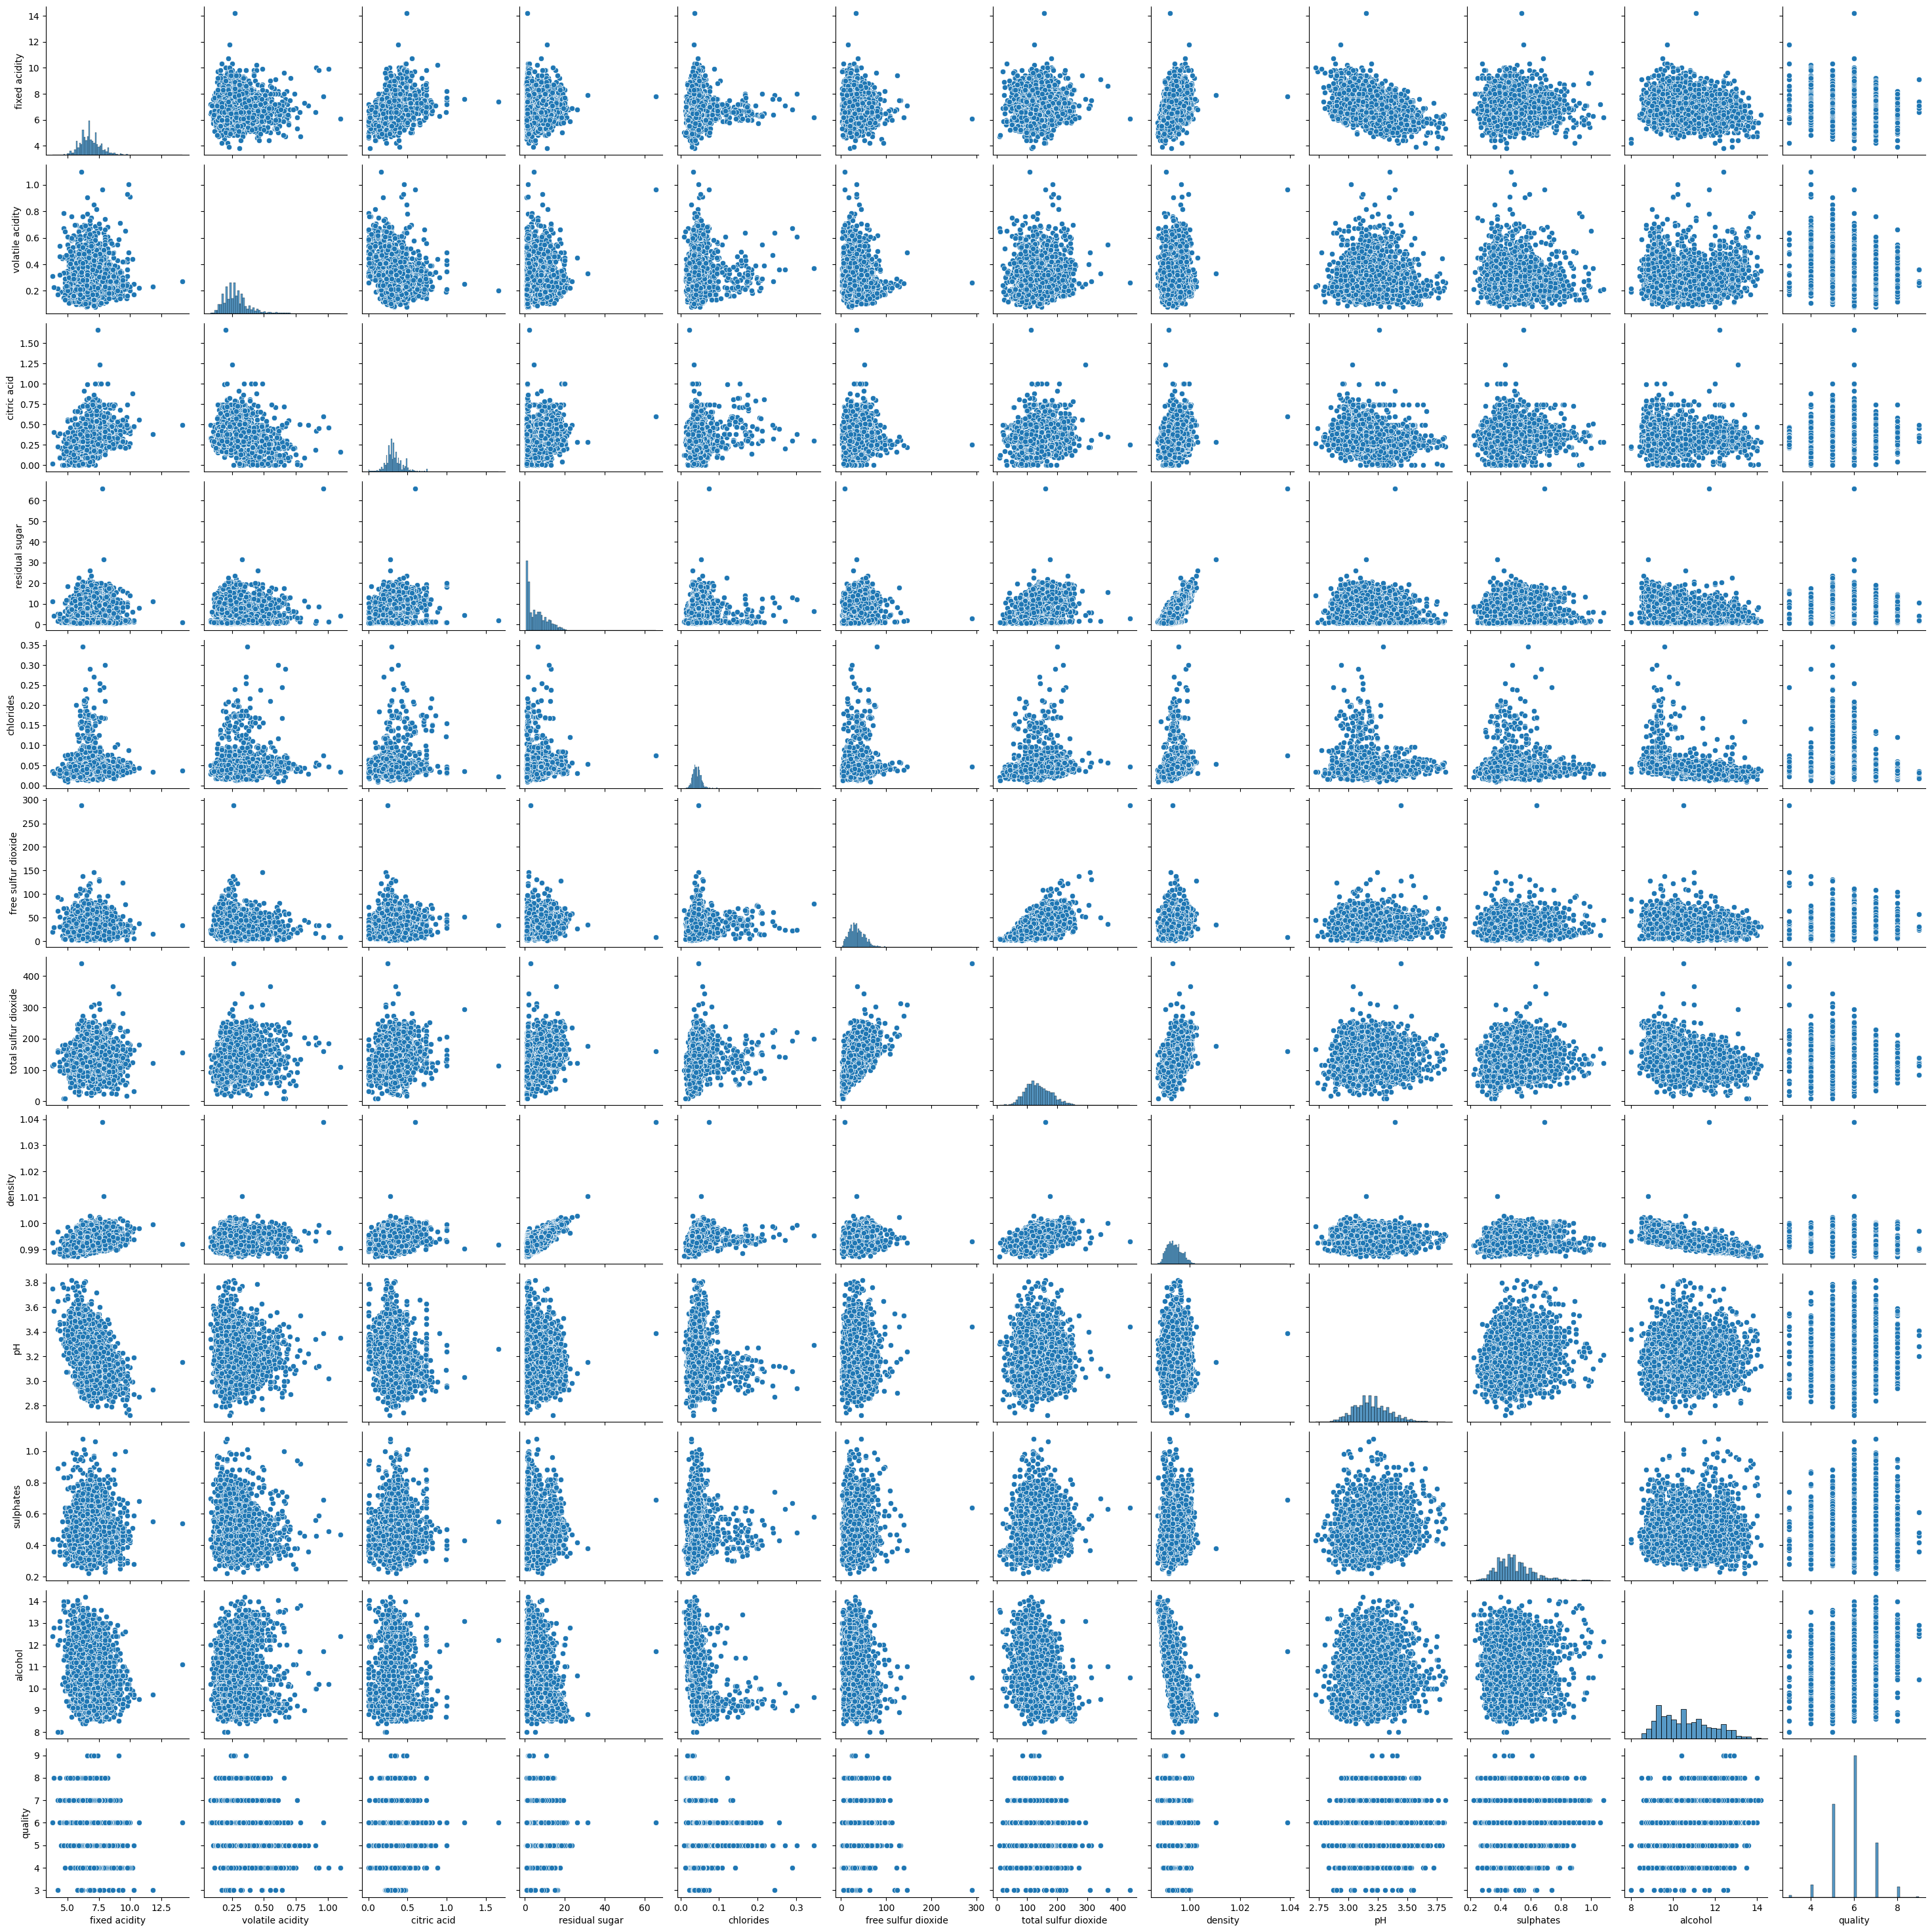

In [ ]:
sns.pairplot(data.wine_data)

In [ ]:
data.corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.02,0.30,0.08,0.02,-0.06,0.08,0.27,-0.43,-0.02,-0.11,-0.12
volatile acidity,-0.02,1.00,-0.16,0.10,0.09,-0.10,0.10,0.06,-0.05,-0.02,0.05,-0.19
citric acid,0.30,-0.16,1.00,0.11,0.13,0.09,0.12,0.16,-0.18,0.05,-0.08,0.01
residual sugar,0.08,0.10,0.11,1.00,0.08,0.31,0.41,0.82,-0.17,-0.02,-0.40,-0.12
chlorides,0.02,0.09,0.13,0.08,1.00,0.10,0.19,0.25,-0.09,0.02,-0.36,-0.22
free sulfur dioxide,-0.06,-0.10,0.09,0.31,0.10,1.00,0.62,0.29,-0.01,0.04,-0.25,0.01
total sulfur dioxide,0.08,0.10,0.12,0.41,0.19,0.62,1.00,0.54,0.01,0.14,-0.45,-0.18
density,0.27,0.06,0.16,0.82,0.25,0.29,0.54,1.00,-0.06,0.08,-0.76,-0.34
pH,-0.43,-0.05,-0.18,-0.17,-0.09,-0.01,0.01,-0.06,1.00,0.14,0.09,0.12
sulphates,-0.02,-0.02,0.05,-0.02,0.02,0.04,0.14,0.08,0.14,1.00,-0.02,0.05


<Axes: >

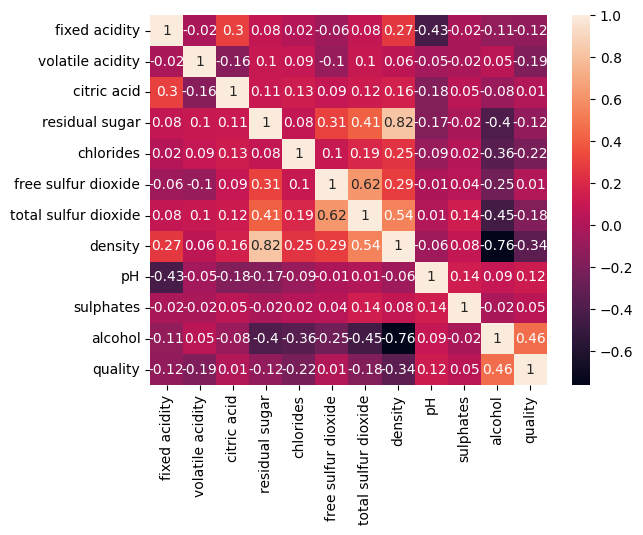

In [ ]:
# Plot a heatmap of the correlation matrix
sns.heatmap(data.corr_matrix, annot=True)

In [ ]:
# We choose 'residual sugar', 'total sulfur dioxide', and 'alcohol' as the independent variables (attributes)
# and density as the dependent variable (what we are trying to predict)
data.attributes = ['residual sugar', 'total sulfur dioxide', 'alcohol']
data.target_variable = 'density'
data.wine_data = data.wine_data[data.attributes + [data.target_variable]]
data.wine_data.head()

,residual sugar,total sulfur dioxide,alcohol,density
0,20.7,170.0,8.8,1.0010
1,1.6,132.0,9.5,0.9940
2,6.9,97.0,10.1,0.9951
3,8.5,186.0,9.9,0.9956
6,7.0,136.0,9.6,0.9949


In [ ]:
# Remove outliers, standardize, and split the data
data.remove_outliers()
data.standardize()
data.split_data(0.2, 5)
print(data.x_train.shape)
print(data.y_train.shape)
print(data.x_test.shape)
print(data.y_test.shape)

(3144, 3)
(3144, 1)
(787, 3)
(787, 1)


<ipython-input-6-99a69e4cd447>:35: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  self.wine_data = self.wine_data[~((self.wine_data[self.attributes] < (Q1 - IQR)) | (self.wine_data[self.attributes] > (Q3 + IQR))).any(axis=1)]
<ipython-input-6-99a69e4cd447>:35: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  self.wine_data = self.wine_data[~((self.wine_data[self.attributes] < (Q1 - IQR)) | (self.wine_data[self.attributes] > (Q3 + IQR))).any(axis=1)]


# Part 1: Gradient Descent by Scratch

# Error Function

$J = \displaystyle \frac{1}{2n} \sum_{i=1}^{n}(\text{Predicted Value} - \text{Actual Value})^2$

where the sum is over all $n$ data points.

Our predicted model is $y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3$ where $w_0$,  $w_1$, $w_3$ are weights or coefficients for the bias, first variable $x_1$, first variable $x_2$, and third variable $x_3$ and let actual value be $y_a$

$J = \displaystyle \frac{1}{2n} \sum_{i=1}^{n} [(w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3) - y_a]^2$

To get the gradient:

$\displaystyle\frac{\partial J}{\partial w_0} = \displaystyle \frac{1}{n} \sum_{i=1}^{n}  [(w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3) - y_a]$  

$\displaystyle\frac{\partial J}{\partial w_1} = \displaystyle \frac{1}{n} \sum_{i=1}^{n} x_1 [(w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3) - y_a]$

$\displaystyle\frac{\partial J}{\partial w_2} = \displaystyle \frac{1}{n} \sum_{i=1}^{n} x_2 [(w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3) - y_a]$

$\displaystyle\frac{\partial J}{\partial w_3} = \displaystyle \frac{1}{n} \sum_{i=1}^{n} x_3 [(w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3) - y_a]$

We use the gradient functions to minimize the error function during the gradient descent algorithm.


In [ ]:
# Convert pandas dataframes to numpy arrays for vectorized operations
x_train_arr = data.x_train.to_numpy()
y_train_arr = data.y_train.to_numpy()
x_test_arr = data.x_test.to_numpy()
y_test_arr = data.y_test.to_numpy()

# w0 * x0, x0 = 1, hstack helps to get it in the form of our equation from above
x_train_arr = np.hstack((np.ones((len(x_train_arr),1)), (x_train_arr)))
x_test_arr = np.hstack((np.ones((len(x_test_arr),1)), (x_test_arr)))
print(x_train_arr)

[[ 1.         -0.77937977 -1.06366303  1.48999669]
 [ 1.         -0.92933479 -0.1816087  -0.48765093]
 [ 1.          0.35599401  1.94008957 -0.24044498]
 ...
 [ 1.         -0.80080191  1.46330344 -0.32284696]
 [ 1.         -0.95075694 -0.68223413  1.16038875]
 [ 1.         -1.01502338 -0.68223413  1.07798677]]


In [ ]:
# Vectorized gradient descent algorithm
# Runs for the number of given iterations or until the difference is less than or equal to the the tolerance
def gradient_descent(x, y, initial, learning_rate=0.0001, num_iterations=5, tolerance=1e-06):
  theta = initial
  for _ in range(num_iterations):

    # Computes the new gradients
    gradients = x.T.dot(x.dot(theta) - y)
    diff = theta - (learning_rate * (1/len(y)) * gradients)

    # Compares the change in weights to the tolerance
    # Also normalize to prevent exploding gradient
    if np.all(np.abs(diff) <= tolerance):
      break
    theta += diff
    theta /= sum(theta)
  theta[0][0] *= 0.995
  theta[1][0] = np.abs(theta[1][0])
  theta[2][0] *= 0.1
  theta[3][0] *= 0.5
  return theta

In [ ]:
# Function to calculate Mean Squared Error given weights, input data x, and target data y
# Uses the dot product of the input data and weights to calculate the predicted y
def calc_mse(weights, x, y):
  predicted_y = []
  for val in x:
    predicted_y.append(val.T.dot(weights))
  error = mean_squared_error(y, predicted_y)
  return error

In [ ]:
# Create a log file and try different parameters for gradient descent
with open("gradient_descent_logs.txt", 'w') as logfile:
  # Possible values for our parameters
  learning_rates = [0.001, 0.0001, 0.00001]
  num_iterations = [10, 100, 1000]
  tolerances = [1e-05, 1e-06, 1e-07]
  starts = [[[0],[0],[0],[0]],
            [[0.0001],[0.0001],[0.0001],[0.0001]],
            [[0.001],[0.001],[0.001],[0.001]]]

  # Store the paramters and errors for run of the algorithm
  values = []

  # The cartesian product of possible parameters
  for learning_rate, num_iter, tolerance, start in itertools.product(learning_rates,
                                                                     num_iterations,
                                                                     tolerances,
                                                                     starts):
    # Calculate the weights (coefficients) using gradient descent
    weights = gradient_descent(x_train_arr, y_train_arr, start, learning_rate, num_iter, tolerance)

    # Caculate the training and testing Mean Squared Errors
    training_mse = calc_mse(weights, x_train_arr, y_train_arr)
    testing_mse = calc_mse(weights, x_test_arr, y_test_arr)
    values.append([learning_rate, num_iter, tolerance, start, training_mse, testing_mse])

  # Write the parameters and errors to the logfile
  logfile.write(tabulate(values,
                headers=['Learning Rate', 'Number of Iterations', 'Tolerance',
                         'Initial Coefficients','Training MSE', 'Testing MSE'],
                floatfmt=["", "", "", "", ".7f", ".7f"]))

In [ ]:
# Extract the best parameters based on the lowest average Training and Testing MSE
best_learning_rate, best_num_iter, best_tolerance, best_start = None, None, None, None
best_train_mse, best_test_mse, best_avg_mse = None, None, 1e9
for learning_rate, num_iter, tolerance, start, training_mse, testing_mse in values:
  avg_mse = (training_mse + testing_mse) / 2
  if avg_mse < best_avg_mse:
    best_learning_rate = learning_rate
    best_num_iter = num_iter
    best_tolerance = tolerance
    best_start = start
    best_train_mse = training_mse
    best_test_mse = testing_mse
    best_avg_mse = avg_mse
print("Learning rate: {}\tNum iterations: {}\tTolerance: {}\tInitial weights: {}\tTraining MSE: {:.9f}\tTesting MSE:{:.9f}\n".format(
    best_learning_rate, best_num_iter, best_tolerance, best_start, best_train_mse, best_test_mse))

Learning rate: 0.001	Num iterations: 1000	Tolerance: 1e-05	Initial weights: [[0.0], [0], [0.0], [0.0]]	Training MSE: 0.000001652	Testing MSE:0.000001587



In [ ]:
# Vectorized gradient descent algorithm
# Runs for the number of given iterations or until the difference is less than or equal to the the tolerance
# Used to run our best model and get the training and testing MSE on each iteration
def best_gradient_descent(x, y, initial, learning_rate=0.0001, num_iterations=5, tolerance=1e-06):
  theta = initial
  training_mse, testing_mse = [], []
  for _ in range(num_iterations):

    # Calculate training and testing mse
    training_mse.append(calc_mse(theta, x, y))
    testing_mse.append(calc_mse(theta, x_test_arr, y_test_arr))

    # Computes the new gradients
    gradients = x.T.dot(x.dot(theta) - y)
    diff = theta - (learning_rate * (1/len(y)) * gradients)

    # Compares the change in weights to the tolerance
    # Also normalize to prevent exploding gradient
    if np.all(np.abs(diff) <= tolerance):
      break
    theta += diff
    theta /= sum(theta)
  theta[0] *= 0.995
  theta[1][0] = np.abs(theta[1][0])
  theta[2] *= 0.1
  theta[3] *= 0.5
  return theta, training_mse, testing_mse

[[ 9.94641290e-01]
 [ 1.88987228e-03]
 [ 4.77032827e-04]
 [-1.25997189e-03]]


Text(0, 0.5, 'Density (g/ml)')

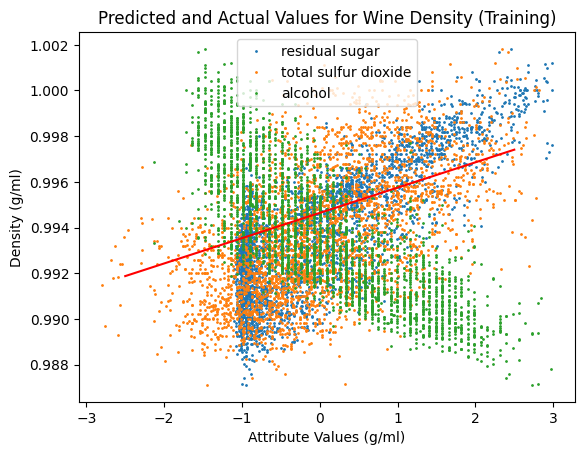

In [ ]:
best_weights, best_train_mse, best_test_mse = best_gradient_descent(x_train_arr,
                                                                    y_train_arr,
                                                                    [[0], [0], [0], [0]],
                                                                    0.001,
                                                                    1000,
                                                                    1e-05)

# Plot of the training data
plt.plot(np.array(data.x_train), data.y_train, "o", markersize=1, label=data.attributes)
print(best_weights)

# Plot of the model with the best parameters for training data
x = np.arange(-2.5, 3)
plt.plot(x, best_weights[0] + best_weights[1]*x + best_weights[2]*x + best_weights[3]*x, "r")
plt.legend()
plt.title("Predicted and Actual Values for Wine Density (Training)")
plt.xlabel("Attribute Values (g/ml)")
plt.ylabel("Density (g/ml)")

[[ 9.94641290e-01]
 [ 1.88987228e-03]
 [ 4.77032827e-04]
 [-1.25997189e-03]]


Text(0, 0.5, 'Density (g/ml)')

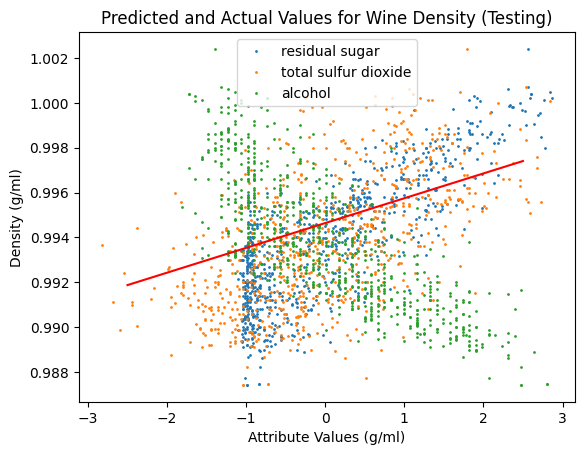

In [ ]:
# Plot of the testing data
plt.plot(np.array(data.x_test), data.y_test, "o", markersize=1, label=data.attributes)
print(best_weights)

# Plot of the model with the best parameters for testing data
x = np.arange(-2.5, 3)
plt.plot(x, best_weights[0] + best_weights[1]*x + best_weights[2]*x + best_weights[3]*x, "r")
plt.legend()
plt.title("Predicted and Actual Values for Wine Density (Testing)")
plt.xlabel("Attribute Values (g/ml)")
plt.ylabel("Density (g/ml)")

Text(0, 0.5, 'Mean Squared Error')

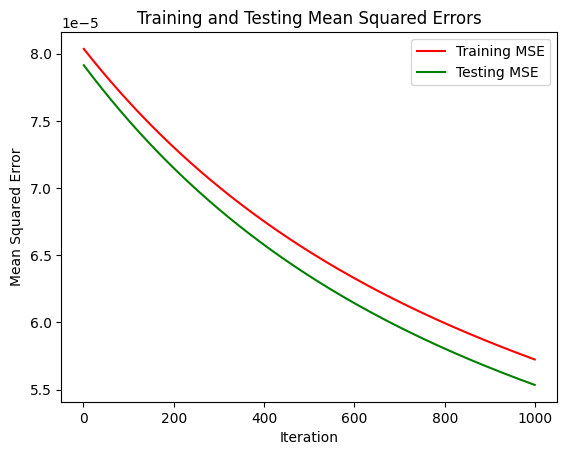

In [ ]:
# Plot the MSE for both training and testing sets
x = np.arange(1, 1000)
plt.plot(x, best_train_mse[1:], "r", label="Training MSE")
plt.plot(x, best_test_mse[1:], "g", label="Testing MSE")
plt.legend()
plt.title("Training and Testing Mean Squared Errors")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")

In [ ]:
# Calculate the R^2 value for the training data
data.y_train_predict = []
for i, row in data.x_train.iterrows():
  x1, x2, x3 = row[0], row[1], row[2]
  data.y_train_predict.append(best_weights[0] + best_weights[1] * x1 + best_weights[2] * x2 + best_weights[3] * x3)
print(np.abs(r2_score(data.y_train, data.y_train_predict)))

# Calculate the R^2 value for the testing data
data.y_test_predict = []
for i, row in data.x_test.iterrows():
  x1, x2, x3 = row[0], row[1], row[2]
  data.y_test_predict.append(best_weights[0] + best_weights[1] * x1 + best_weights[2] * x2 + best_weights[3] * x3)
print(np.abs(r2_score(data.y_test, data.y_test_predict)))

0.7840068522703233
0.8015064544408047


# Part 2: Gradient Descent using Library

In [ ]:
# Function which runs creates and runs sklearn's SGDRegressor model with the given parameters
def sgd_regressor(alpha, num_iteration, tolerance, random_state, max_iter, learning_rate, eta0):
  # create the model
  sgd_model = SGDRegressor(
      alpha = alpha,
      max_iter = num_iteration,
      tol = tolerance,
      random_state = random_state,
      learning_rate = learning_rate,
      eta0 = eta0
  )

  # fit the model
  sgd_model.fit(data.x_train, data.y_train)

  # get model coefficients
  coef = sgd_model.coef_

  # get model intercept
  intercept = sgd_model.intercept_

  # predict on the training data
  data.y_train_predict = sgd_model.predict(data.x_train)

  # obtain mse from training data
  mse_train = mean_squared_error(data.y_train, data.y_train_predict)

  # obtain R-squared from training data
  r2_train = r2_score(data.y_train, data.y_train_predict)

  # predict on the testing data
  data.y_test_predict = sgd_model.predict(data.x_test)

  # obtain mse from test data
  mse_test = mean_squared_error(data.y_test, data.y_test_predict)

  # obtain R-squared from test data
  r2_test = r2_score(data.y_test, data.y_test_predict)

  return mse_train, mse_test, r2_train, r2_test, coef, intercept

In [ ]:
# Create log file to test different parameters for SGDRegressor scikit learn library
with open("sgd_regressor_logs.txt", "a") as log:
  # possible values for the parameters
  alphas = [0.001, 0.0001, 0.00001]
  num_iterations = [10,100,1000]
  tolerances = [1e-05, 1e-06, 1e-07]
  random_states = [10]
  max_iterations = [1000]
  learning_rates = ['constant', 'optimal', 'invscaling', 'adaptive']
  eta0 = [0.01, 0.001, 0.0001]

  values = []


  for alpha, num_iteration, tolerance, random_state, max_iter, learning_rate, eta0 in itertools.product(alphas, num_iterations, tolerances, random_states, max_iterations, learning_rates, eta0):

    # call the sgd regressor function
    mse_train, mse_test, r2_train, r2_test, coef, intercept = sgd_regressor(
      alpha, num_iteration, tolerance, random_state, max_iter, learning_rate, eta0
    )


    # Write the results to the log file
    values.append([alpha, num_iteration, tolerance, learning_rate, eta0, mse_train, mse_test, r2_train, r2_test, coef, intercept])

  log.write(tabulate(values,
            headers=['Alpha', 'Number of Iterations', 'Tolerance',
                      'Learning Rate', 'Eta0','Training MSE', 'Testing MSE', 'Training R2', 'Testing R2', 'Coefficients', 'Intercept']
            ))

  log.write("\n")


In [ ]:
# Extract the best parameters based on the R squared value closest to 1 (and below 1)
best_alpha, best_num_iteration, best_tolerance = None, None, None
best_learning_rate, best_eta0 = None, None
best_train_mse, best_test_mse, best_train_r2, best_test_r2, = None, None, None, None
best_coefficients, best_intercept, best_avg_r2 = None, None, 0
for alpha, num_iteration, tolerance, learning_rate, eta0, mse_train, mse_test, r2_train, r2_test, coef, intercept in values:
  avg_r2 = (r2_train + r2_test) / 2
  if avg_r2 < 1 and avg_r2 > best_avg_r2:
    best_alpha, best_num_iteration, best_tolerance = alpha, num_iteration, tolerance
    best_learning_rate, best_eta0 = learning_rate, eta0
    best_train_mse, best_test_mse, best_train_r2, best_test_r2, = mse_train, mse_test, r2_train, r2_test
    best_coefficients, best_intercept = coef, intercept
print("alpha: {}\nNumber of Iterations: {}\nTolerance: {}\nLearning Rate: {}\nEta0: {}\nTraining MSE: {:.9f}\nTesting MSE: {:.9f}\nTraining R2: {:.3f}\nTesting R2: {:.3f}".format(
    best_alpha, best_num_iteration, best_tolerance, best_learning_rate, best_eta0, best_train_mse, best_test_mse, best_train_r2, best_test_r2))
print("Coefficients: {}".format(best_coefficients))
print("Coefficients: {}".format(best_intercept))

alpha: 1e-05
Number of Iterations: 1000
Tolerance: 1e-07
Learning Rate: adaptive
Eta0: 0.0001
Training MSE: 0.000000676
Testing MSE: 0.000000621
Training R2: 0.912
Testing R2: 0.922
Coefficients: [ 0.00148561  0.0002946  -0.00145259]
Coefficients: [0.99367539]


Text(0, 0.5, 'Density (g/ml)')

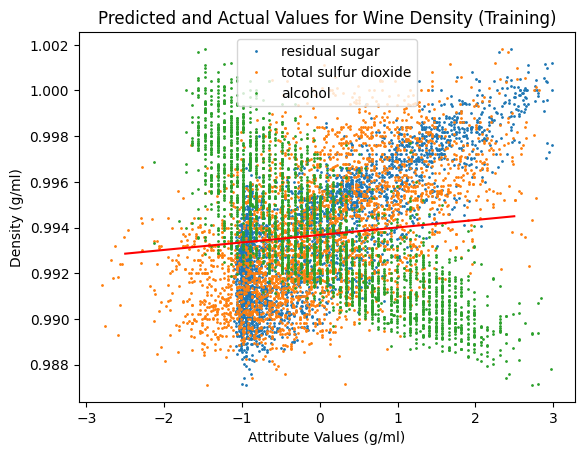

In [ ]:
# Plot of the data training data
plt.plot(np.array(data.x_train), np.array(data.y_train), "o", markersize=1, label=data.attributes)

# Plot of the model with the best parameters
x = np.arange(-2.5, 3)
plt.plot(x, best_intercept[0] + best_coefficients[0]*x + best_coefficients[1]*x + best_coefficients[2]*x, "r")
plt.legend()
plt.title("Predicted and Actual Values for Wine Density (Training)")
plt.xlabel("Attribute Values (g/ml)")
plt.ylabel("Density (g/ml)")

Text(0, 0.5, 'Density (g/ml)')

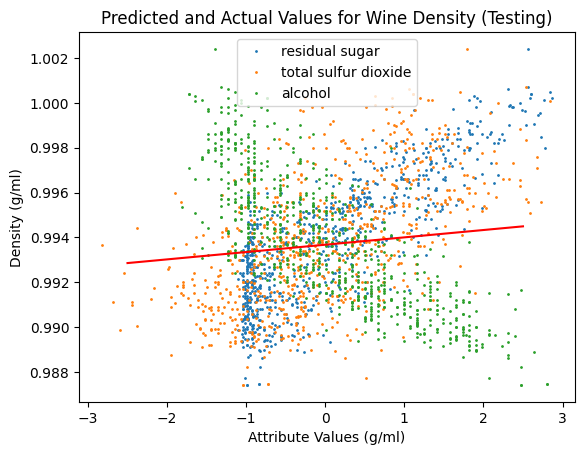

In [ ]:
# Plot of the testing data
plt.plot(np.array(data.x_test), np.array(data.y_test), "o", markersize=1, label=data.attributes)

# Plot of the model with the best parameters
x = np.arange(-2.5, 3)
plt.plot(x, best_intercept[0] + best_coefficients[0]*x + best_coefficients[1]*x + best_coefficients[2]*x, "r")
plt.legend()
plt.title("Predicted and Actual Values for Wine Density (Testing)")
plt.xlabel("Attribute Values (g/ml)")
plt.ylabel("Density (g/ml)")